# 6.5.1Best Subset Selection

In [1]:
#imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('precision',2)
pd.set_option('display.max_rows',12)
pd.set_option('display.float_format','{:20,.2f}'.format)
plt.style.use('seaborn')

# 6.5.1 Best subset selection

In [2]:
hitters = pd.read_csv('/Users/appler/Desktop/ISLR/Hitters.csv',index_col=0).dropna()
hitters.index.name='Player'

In [5]:
hitters=hitters.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,17]]

hitters['League'] = pd.get_dummies(hitters['League']).iloc[:,0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:,0]
hitters['NewLeague']=pd.get_dummies(hitters['NewLeague']).iloc[:,0]

X=hitters.iloc[:,0:18]
y=hitters.iloc[:,18]

About this file
AtBat: Number of times at bat in 1986

Hits: Number of hits in 1986

HmRun: Number of home runs in 1986

Runs: Number of runs in 1986

RBI: Number of runs batted in in 1986

Walks: Number of walks in 1986

Years: Number of years in the major leagues

CAtBat: Number of times at bat during his career

CHits: Number of hits during his career

CHmRun: Number of home runs during his career

CRuns: Number of runs during his career

CRBI: Number of runs batted in during his career

CWalks: Number of walks during his career

League: A factor with levels A and N indicating player's league at the end of 1986

Division: A factor with levels E and W indicating player's division at the end of 1986

PutOuts: Number of put outs in 1986

Assists: Number of assists in 1986

Errors: Number of errors in 1986

Salary: 1987 annual salary on opening day in thousands of dollars

NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

In [7]:
k_features = 1
sub=[]
reg=[]
kft=[]
n_features = X.shape[1]

for k_features in range(1,20):
    subsets = chain(combinations(range(n_features),k_features))
    
    best_score = np.inf
    
    for subset in subsets:
        lin_reg = sm.OLS(y,sm.add_constant(X.iloc[:,list(subset)])).fit()
        score=lin_reg.ssr
        if score < best_score:
            best_score, best_subset = score, list(subset)
            best_reg = lin_reg
    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(k_features)

In [8]:
results = pd.DataFrame({'kft':kft,'sub':sub,'reg':reg},columns=['sub','reg','kft']).set_index('kft')

In [10]:
results

,sub,reg
kft,,
1,[10],<statsmodels.regression.linear_model.Regressio...
2,"[0, 10]",<statsmodels.regression.linear_model.Regressio...
3,"[0, 10, 14]",<statsmodels.regression.linear_model.Regressio...
4,"[0, 10, 13, 14]",<statsmodels.regression.linear_model.Regressio...
5,"[0, 4, 10, 13, 14]",<statsmodels.regression.linear_model.Regressio...
...,...,...
15,"[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...
16,"[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...
17,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...",<statsmodels.regression.linear_model.Regressio...


In [16]:
results=pd.read_pickle('results')

FileNotFoundError: [Errno 2] No such file or directory: 'results'

AttributeError: 'DataFrame' object has no attribute 'rss'

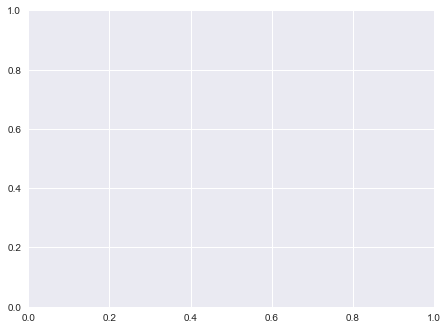

In [13]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
results.rss.plot(title='RSS',lw=1, color='blue')


In [ ]:


plt.subplot(2,2,3)
min_aic = results.aic.argmin()-1
results.aic.plot(title='AIC',markevery=[min_arc],marker='D',lw=1,color='green')

plt.subplot(2,2,4)
min_bic = results.bic.argmin()-1
results.bic.plot(title='BIC',markevery=[min_brc],marker='D',lw=1,color='purple')

AttributeError: 'DataFrame' object has no attribute 'r2a'

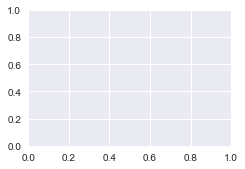

In [14]:
plt.subplot(2,2,2)
max_r2a = results.r2a.argmax()-1
results.r2a.plot(title='Adj. $R^2$',markevery=[max_r2a],marker='D',lw=1,color='red')

In [18]:
bic_reg = sm.OLS(y,sm.add_constant(X.iloc[:,[0,1,5,11,14,15]])).fit()
bic_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     30.71
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           1.09e-27
Time:                        20:11:21   Log-Likelihood:                -1908.8
No. Observations:                 263   AIC:                             3832.
Df Residuals:                     256   BIC:                             3857.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -138.9182     68.770     -2.020      0.044    -274.344      -3.492
Hits           3.4124      0.654      5.220      0.000       2.125       4.700
HmRun          1.1952      3.219      0.371      0.711      -5.144       7.534
Years         10.0423      8.368      1.200      0.231      -6.436      26.520
CWalks         0.5822      0.155      3.768      0.000       0.278       0.886
PutOuts        0.2790      0.082      3.410      0.001       0.118       0.440
Assists       -0.1101      0.171     -0.643      0.521      -0.447       0.227
==============================================================================
Omnibus:                      120.476   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              828.622
Skew:                           1.695   Prob(JB):                    1.17e-180
Kurtosis:                      11.008   Cond. No.                     1.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 6.5.2 Forward and Backward Stepwise Selection

In [19]:
def processSubset(feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS= regr.ssr
    return {'model':regr, 'RSS': RSS}

#forward selection

In [20]:
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

In [25]:
models2 = pd.DataFrame(columns=['RSS','model'])

predictors=[]

for i in range(1,len(X.columns)+1):
    models2.loc[i]=forward(predictors)
    predictors = models2.loc[i]['model'].model.exog_names

bic_f=[]

for m in models2.model:
    bic_f.append(m.bic)

np.array(bic_f).argmin()

4

backward selection

In [21]:
def backward(predictors):
    results = []
    for combo in combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

In [26]:
models3=pd.DataFrame(columns=['RSS','model'],index=range(1,len(X.columns)))

predictors = X.columns

while (len(predictors)>1):
    models3.loc[len(predictors)-1]=backward(predictors)
    predictors = models3.loc[len(predictors)-1]['model'].model.exog_names

bic_b=[]

for m in models3.model:
    bic_b.append(m.bic)
    
np.array(bic_b).argmin()

5

6.5.3 Choose among models using the validation set approach and cross-validation